<a href="https://colab.research.google.com/github/emanuelebrizzi/bootcamp/blob/main/code_vulnerability_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

# **Data upload**


In [43]:
#from google.colab import files
#import zipfile
#import os

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import os
import glob

# Directory path
drive_path = "/content/drive/MyDrive/bootcamp_file"

libpng_path = os.path.join(drive_path, "LibPNG")

libpng_vuln_path = os.path.join(libpng_path, "Vulnerable_functions")
libpng_non_vuln_path = os.path.join(libpng_path, "Non_vulnerable_functions")

vlc_path = os.path.join(drive_path, "VLC")

vlc_vuln_path = os.path.join(vlc_path, "Vulnerable_functions")
vlc_non_vuln_path = os.path.join(vlc_path, "Non_vulnerable_functions")

pidgin_path = os.path.join(drive_path, "Pidgin")

pidgin_vuln_path = os.path.join(pidgin_path, "Vulnerable_functions")
pidgin_non_vuln_path = os.path.join(pidgin_path, "Non_vulnerable_functions")


In [45]:

def load_files_from_folder(folder, label):
    files = glob.glob(os.path.join(folder, "*.c"))
    data = []
    for file in files:
        with open(file, "r", encoding="utf-8", errors="ignore") as f:
            data.append((f.read(), label, os.path.basename(file)))
    return data


# **Replace Function names and Variable names**

In [46]:
import re
import random
import string
from pathlib import Path

In [47]:
# Removes comments from C code
def remove_comments(code):
    code = re.sub(r'//.*', '', code)
    code = re.sub(r'/\*.*?\*/', '', code, flags=re.DOTALL)
    return code

# Extracts variable and function names from C code
def extract_identifiers(code):
    pattern = re.compile(r'\b([a-zA-Z_][a-zA-Z0-9_]*)\b')
    keywords = set(['int', 'char', 'float', 'double', 'return', 'if', 'else', 'while', 'for', 'do', 'switch', 'case', 'void'])
    identifiers = set(pattern.findall(code)) - keywords
    return identifiers

# Classifies identifiers as variables or functions
def categorize_identifiers(identifiers):
    var_counter, fun_counter = 1, 1
    replacements = {}
    for identifier in identifiers:
        if re.search(r'\b[A-Za-z_][A-Za-z0-9_]*\s*\(', identifier):
            replacements[identifier] = f'fun_{fun_counter}'
            fun_counter += 1
        else:
            replacements[identifier] = f'var_{var_counter}'
            var_counter += 1
    return replacements

# Replaces variable and function names with new names
def replace_identifiers(code, replacements):

    for old, new in replacements.items():
        code = re.sub(r'\b' + re.escape(old) + r'\b', new, code)
    return code

# Reads a C file, replaces names, and saves the new file
def process_c_file(filepath, new_filepath):
    with open(filepath, 'r', encoding='Latin-1') as file:
        code = file.read()

    code_no_comments = remove_comments(code)
    identifiers = extract_identifiers(code_no_comments)
    replacements = categorize_identifiers(identifiers)
    new_code = replace_identifiers(code_no_comments, replacements)
    with open(new_filepath, 'w', encoding='Latin-1') as file:
        file.write(new_code)

# Processes all C files in a directory
def process_directory(directory, new_directory_path):
    for filepath in Path(directory).glob("*.c"):
        new_filepath = os.path.join(new_directory_path, os.path.basename(filepath))
        process_c_file(filepath, new_filepath)

In [48]:
import shutil

def create_directory(directory_path):
    if os.path.exists(directory_path):
        shutil.rmtree(directory_path)
    os.makedirs(directory_path, exist_ok=True)

# Creation modified directory
modified_path = os.path.join(drive_path, "modified_files")
#create_directory(modified_path)

libpng_modified = os.path.join(modified_path, "LibPNG")
#create_directory(libpng_modified)

vlc_modified = os.path.join(modified_path, "VLC")
#create_directory(vlc_modified)

pidgin_modified = os.path.join(modified_path, "Pidgin")
#create_directory(pidgin_modified)

libpng_modified_vuln_path = os.path.join(libpng_modified, "Vulnerable_functions")
#create_directory(libpng_modified_vuln_path)
libpng_modified_non_vuln_path = os.path.join(libpng_modified, "Non_vulnerable_functions")
#create_directory(libpng_modified_non_vuln_path)

vlc_modified_vuln_path = os.path.join(vlc_modified, "Vulnerable_functions")
#create_directory(vlc_modified_vuln_path)
vlc_modified_non_vuln_path = os.path.join(vlc_modified, "Non_vulnerable_functions")
#create_directory(vlc_modified_non_vuln_path)

pidgin_modified_vuln_path = os.path.join(pidgin_modified, "Vulnerable_functions")
#create_directory(pidgin_modified_vuln_path)
pidgin_modified_non_vuln_path = os.path.join(pidgin_modified, "Non_vulnerable_functions")
#create_directory(pidgin_modified_non_vuln_path)

In [ ]:
process_directory(libpng_vuln_path, libpng_modified_vuln_path)
process_directory(libpng_non_vuln_path, libpng_modified_non_vuln_path)
process_directory(vlc_vuln_path, vlc_modified_vuln_path)
process_directory(vlc_non_vuln_path, vlc_modified_non_vuln_path)
process_directory(pidgin_vuln_path, pidgin_modified_vuln_path)
process_directory(pidgin_non_vuln_path, pidgin_modified_non_vuln_path)

# Dataset preparation

In [49]:
import os
import numpy as np
from collections import Counter
from tabulate import tabulate
import random
import os
import re

In [50]:
# Load and label data
def load_data(directory, label):
    data = []
    for filename in os.listdir(directory):
        with open(os.path.join(directory, filename), 'r') as file:
            data.append((file.read(), label))
    return data

vulnerable_files = load_data(libpng_modified_vuln_path, label=1)
non_vulnerable_files = load_data(libpng_modified_non_vuln_path, label=0)

# Combine and shuffle dataset
dataset = vulnerable_files + non_vulnerable_files
np.random.shuffle(dataset)

texts, labels = zip(*dataset)

In [51]:
# Load and label data
def load_data_directoies(directories, label):
    data = []
    for directory in directories:  # Iteriamo sulle directory della lista
        for filename in os.listdir(directory):  # Ora directory è una stringa
            with open(os.path.join(directory, filename), 'r') as file:
                data.append((file.read(), label))
    return data
vulnerable_files = load_data_directoies([libpng_modified_vuln_path, vlc_modified_vuln_path, pidgin_modified_vuln_path], label=1)
non_vulnerable_files = load_data_directoies([libpng_modified_non_vuln_path, vlc_modified_non_vuln_path, pidgin_modified_non_vuln_path], label=0)

# Combine and shuffle dataset
dataset = vulnerable_files + non_vulnerable_files
np.random.shuffle(dataset)

texts, labels = zip(*dataset)

### Dataset info

In [52]:
print("Vulnerable files: ", len(vulnerable_files))
print("Non Vulnerable files: ", len(non_vulnerable_files))
print("Dataset files: ", len(dataset))

Vulnerable files:  118
Non Vulnerable files:  15318
Dataset files:  15436


In [53]:
n = len(vulnerable_files) * 8

non_vulnerable_files_selected = random.sample(non_vulnerable_files, min(n, len(non_vulnerable_files)))

dataset = vulnerable_files + non_vulnerable_files_selected
random.shuffle(dataset)

texts, labels = zip(*dataset)


In [54]:
print("Vulnerable files: ", len(vulnerable_files))
print("Non Vulnerable files: ", len(non_vulnerable_files_selected))
print("Dataset files: ", len(dataset))

Vulnerable files:  118
Non Vulnerable files:  944
Dataset files:  1062


# Models

In [84]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, GRU


In [76]:
# Tokenize the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

In [77]:
# Pad sequences
max_length = 500  # Adjust based on dataset
data = pad_sequences(sequences, maxlen=max_length, padding='post')
labels = np.array(labels)

In [78]:
# Split dataset into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [79]:
embedding_dim = 128
batch_size = 32
epochs = 5

BLSTM Model

In [81]:
# Model Creation
blstm_model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(LSTM(32, return_sequences=False, dropout=0.3, recurrent_dropout=0.1)),
    Dense(1, activation='sigmoid')
])

blstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train BLSTM model
print("Training BLSTM Model...")
blstm_history = blstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Evaluate BLSTM model
blstm_loss, blstm_accuracy = blstm_model.evaluate(X_test, y_test)
print(f"BLSTM Test Loss: {blstm_loss}")
print(f"BLSTM Test Accuracy: {blstm_accuracy}")

# Predict using BLSTM model
blstm_predictions = blstm_model.predict(X_test)
blstm_y_pred = (blstm_predictions > 0.5).astype(int)

Training BLSTM Model...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8717 - loss: 0.4888 - val_accuracy: 0.9155 - val_loss: 0.2832
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8916 - loss: 0.2915 - val_accuracy: 0.9155 - val_loss: 0.2883
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8644 - loss: 0.3561 - val_accuracy: 0.9061 - val_loss: 0.2855
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8885 - loss: 0.3493 - val_accuracy: 0.9108 - val_loss: 0.2778
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9082 - loss: 0.2872 - val_accuracy: 0.8779 - val_loss: 0.2632
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.9069 - loss: 0.2497
BLSTM Test Loss: 0.273508220911026
BLSTM Test Accuracy: 0.8873239159584045
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 323ms/step


GRU Model

In [85]:
# GRU Model Creation
gru_model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim, input_length=max_length),
    GRU(32, return_sequences=False, dropout=0.3, recurrent_dropout=0.1),
    Dense(1, activation='sigmoid')
])

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train GRU model
print("Training GRU Model...")
gru_history = gru_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Evaluate GRU model
gru_loss, gru_accuracy = gru_model.evaluate(X_test, y_test)
print(f"GRU Test Loss: {gru_loss}")
print(f"GRU Test Accuracy: {gru_accuracy}")

# Predict using GRU model
gru_predictions = gru_model.predict(X_test)
gru_y_pred = (gru_predictions > 0.5).astype(int)

Training GRU Model...
Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 647ms/step - accuracy: 0.8664 - loss: 0.5063 - val_accuracy: 0.9155 - val_loss: 0.2967
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 559ms/step - accuracy: 0.8713 - loss: 0.3604 - val_accuracy: 0.9108 - val_loss: 0.2920
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 615ms/step - accuracy: 0.9010 - loss: 0.3169 - val_accuracy: 0.9108 - val_loss: 0.2908
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 558ms/step - accuracy: 0.9134 - loss: 0.3056 - val_accuracy: 0.9014 - val_loss: 0.2915
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 621ms/step - accuracy: 0.9186 - loss: 0.2938 - val_accuracy: 0.9014 - val_loss: 0.2913
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.9274 - loss: 0.2723
GRU Test Loss: 0.3093907833099365
GRU Test Accuracy: 0.9061033129692078
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step


### Comparison

In [87]:
import matplotlib.pyplot as plt

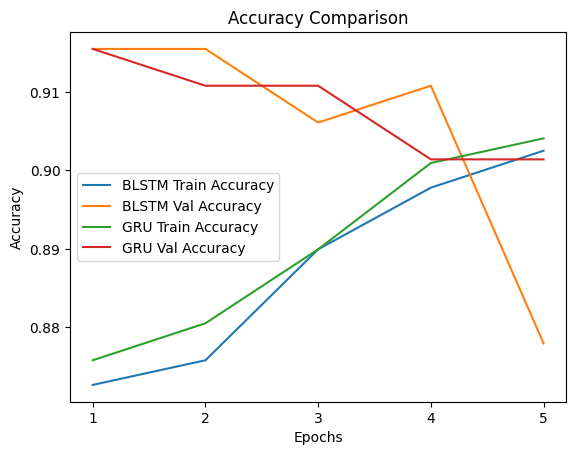

In [93]:
# Accuracy comparison
plt.plot(blstm_history.history['accuracy'], label='BLSTM Train Accuracy')
plt.plot(blstm_history.history['val_accuracy'], label='BLSTM Val Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Train Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Val Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(0, epochs), labels=range(1, epochs + 1))
plt.legend()
plt.show()


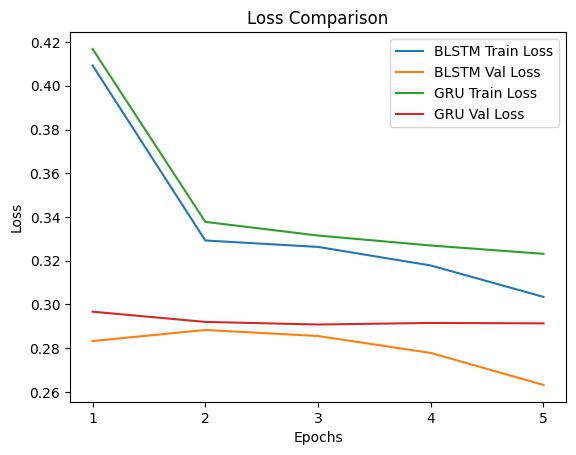

In [94]:
# Loss comparison
plt.plot(blstm_history.history['loss'], label='BLSTM Train Loss')
plt.plot(blstm_history.history['val_loss'], label='BLSTM Val Loss')
plt.plot(gru_history.history['loss'], label='GRU Train Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Val Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(ticks=range(0, epochs), labels=range(1, epochs + 1))
plt.legend()
plt.show()

## **Cross Validation** with K-Fold

In [96]:
from sklearn.model_selection import KFold

# Define K-Fold Cross-Validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

embedding_dim = 128
batch_size = 32
epochs = 5

folds_indices = list(kf.split(data))

In [111]:
blstm_accuracies = []
blstm_losses = []

for fold, (train_index, test_index) in enumerate(folds_indices):
    print(f"Training on Fold {fold+1}/{k_folds}...")

    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Model Creation
    blstm_model = Sequential([
        Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim, input_length=max_length),
        Bidirectional(LSTM(32, return_sequences=False, dropout=0.3, recurrent_dropout=0.1)),
        Dense(1, activation='sigmoid')
    ])


    blstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    blstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

    blstm_loss, blstm_accuracy = blstm_model.evaluate(X_test, y_test, verbose=0)
    blstm_accuracies.append(blstm_accuracy)
    blstm_losses.append(blstm_loss)
    print(f"BLSTM Fold {fold+1} - Test Loss: {blstm_loss:.4f}, Test Accuracy: {blstm_accuracy:.4f}")

print(f"Average Accuracy: {np.mean(blstm_accuracies)}")





Training on Fold 1/5...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8208 - loss: 0.4697 - val_accuracy: 0.8882 - val_loss: 0.3275
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8748 - loss: 0.3306 - val_accuracy: 0.8882 - val_loss: 0.3223
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9036 - loss: 0.2989 - val_accuracy: 0.8882 - val_loss: 0.3193
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8944 - loss: 0.2996 - val_accuracy: 0.9000 - val_loss: 0.3167
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9100 - loss: 0.2898 - val_accuracy: 0.9000 - val_loss: 0.3072
BLSTM Fold 1 - Test Loss: 0.2950, Test Accuracy: 0.9014
Training on Fold 2/5...
Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8945 - loss: 0.4802 - val_accuracy: 0.9000 - val_loss: 0.3195
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8751 - loss: 0.3502 - val_accuracy: 0.9000 - val_loss: 0.3122
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accu

KeyboardInterrupt: 

In [ ]:
gru_accuracies = []
gru_losses = []

for fold, (train_index, test_index) in enumerate(folds_indices):
    print(f"Training on Fold {fold+1}/{k_folds}...")

    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    print(f"\nTraining GRU Model on Fold {fold+1}...")
    gru_model = Sequential([
        Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim, input_length=max_length),
        GRU(32, return_sequences=False, dropout=0.3, recurrent_dropout=0.1),
        Dense(1, activation='sigmoid')
    ])

    gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    gru_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

    gru_loss, gru_accuracy = gru_model.evaluate(X_test, y_test, verbose=0)
    gru_accuracies.append(gru_accuracy)
    gru_losses.append(gru_loss)
    print(f"GRU Fold {fold+1} - Test Loss: {gru_loss:.4f}, Test Accuracy: {gru_accuracy:.4f}")

print(f"Average Accuracy: {np.mean(gru_accuracies)}")



### Comparison

In [ ]:
# Plot accuracy for each fold
folds = range(1, k_folds + 1)

plt.figure(figsize=(10, 6))
plt.plot(folds, blstm_accuracies, marker='o', label='BLSTM Accuracy')
plt.plot(folds, gru_accuracies, marker='s', label='GRU Accuracy')

plt.title('Accuracy per Fold (BLSTM vs GRU)', fontsize=14)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(folds)  # Ensure x-axis has integer fold numbers
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


In [ ]:
# Plot Losses for each fold
folds = range(1, k_folds + 1)

plt.figure(figsize=(10, 6))
plt.plot(folds, blstm_losses, marker='o', label='BLSTM Losses')
plt.plot(folds, gru_losses, marker='s', label='GRU Losses')

plt.title('Losses per Fold (BLSTM vs GRU)', fontsize=14)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Losses', fontsize=12)
plt.xticks(folds)  # Ensure x-axis has integer fold numbers
plt.ylim(0, 1)  # Losses ranges from 0 to 1
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


## CVE Details for multi label classification

In [71]:
# Lista per salvare i nomi dei file che contengono i cve id
cve_files = []

# Espressione regolare per trovare i nomi compatibili
pattern = re.compile(r"(?i)(?:^|_)cve-(\d{4})-(\d{4,5})")

# Scansiona la directory
for file in os.listdir(libpng_modified_vuln_path):
    # Cerca nel nome del file
    match = pattern.search(file)
    if match:
        formatted_name = f"CVE-{match.group(1)}-{match.group(2)}"
        cve_files.append(formatted_name)


for file in os.listdir(vlc_modified_vuln_path):
    # Cerca nel nome del file
    match = pattern.search(file)
    if match:
        formatted_name = f"CVE-{match.group(1)}-{match.group(2)}"
        cve_files.append(formatted_name)


for file in os.listdir(pidgin_modified_vuln_path):
    # Cerca nel nome del file
    match = pattern.search(file)
    if match:
        formatted_name = f"CVE-{match.group(1)}-{match.group(2)}"
        cve_files.append(formatted_name)



print("Vulnerable files: (CVE) ", len(cve_files))


# Conta tutte le occorrenze
occurrences = Counter(cve_files)

# Creiamo una tabella con i dati
table_data = [(cve, count) for cve, count in occurrences.items()]

# Stampa in formato tabella leggibile
print(tabulate(table_data, headers=["CVE", "Occorrenze"], tablefmt="grid"))


Vulnerable files: (CVE)  118
+----------------+--------------+
| CVE            |   Occorrenze |
+================+==============+
| CVE-2015-0973  |            1 |
+----------------+--------------+
| CVE-2004-0599  |            2 |
+----------------+--------------+
| CVE-2014-9495  |            1 |
+----------------+--------------+
| CVE-2011-3464  |            1 |
+----------------+--------------+
| CVE-2011-0408  |            2 |
+----------------+--------------+
| CVE-2004-0597  |            3 |
+----------------+--------------+
| CVE-2007-2445  |            1 |
+----------------+--------------+
| CVE-2006-0481  |            1 |
+----------------+--------------+
| CVE-2012-3425  |            1 |
+----------------+--------------+
| CVE-2008-5907  |            1 |
+----------------+--------------+
| CVE-2018-13785 |            1 |
+----------------+--------------+
| CVE-2011-3328  |            1 |
+----------------+--------------+
| CVE-2007-5269  |            2 |
+----------------+-

https://nvd.nist.gov/developers/vulnerabilities

In [72]:
import requests
import time

def get_cve_details(cve_id):
    # URL to obtain vulnerability details from the NVD in JSON format
    url = f'https://services.nvd.nist.gov/rest/json/cves/2.0/?cveId={cve_id}'

    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data
    elif response.status_code == 403:
        time.sleep(30)
        return get_cve_details(cve_id)
    else:
        print(f"Error fetching data for {cve_id}: {response.status_code}")
        return None

* Classification by CVSS:
  * **Low**: CVSS score from 0.0 to 3.9
  * **Medium**: CVSS score from 4.0 to 6.9
  * **High**: CVSS score from 7.0 to 8.9
  * **Critical**: CVSS score from 9.0 to 10.0

* Classification by CWE

In [74]:
def get_cve_cvss_cwe(cve_id):
    data_cve = get_cve_details(cve_id)
    if data_cve is None:
        return None
    try:
      cvss_score = data_cve["vulnerabilities"][0]["cve"]["metrics"]["cvssMetricV2"][0]["cvssData"]["baseScore"]
    except KeyError:
      print(f"CVSS score not found for {cve_id}")
      cvss_score = None
    try:
      cvss_severity = data["vulnerabilities"][0]["cve"]["metrics"]["cvssMetricV2"][0]["baseSeverity"]
    except KeyError:
      print(f"CVSS severity not found for {cve_id}")
      cvss_severity = None
    try:
      cwe_value = data_cve["vulnerabilities"][0]["cve"]["weaknesses"][0]["description"][0]["value"]
    except KeyError:
      print(f"CWE not found for {cve_id}")
      cwe_value = None
    return cvss_score, cvss_severity, cwe_value

cvss = []
severity = []
cwe = []

for cve in cve_files:
    cvss, severity, cwe = get_cve_cvss_cwe(cve)
    print(f"{cve}: CVSS Score = {cvss} Severity = {severity}, CWE = {cwe}")


CVE-2015-0973: CVSS Score = 7.5 Severity = MEDIUM, CWE = CWE-119
CVE-2004-0599: CVSS Score = 5.0 Severity = MEDIUM, CWE = NVD-CWE-Other
CVE-2014-9495: CVSS Score = 10.0 Severity = MEDIUM, CWE = CWE-119
CVE-2011-3464: CVSS Score = 7.5 Severity = MEDIUM, CWE = CWE-189
CVE-2011-0408: CVSS Score = 6.8 Severity = MEDIUM, CWE = CWE-119
CVE-2004-0597: CVSS Score = 10.0 Severity = MEDIUM, CWE = NVD-CWE-Other
CVE-2004-0597: CVSS Score = 10.0 Severity = MEDIUM, CWE = NVD-CWE-Other
CVE-2007-2445: CVSS Score = 5.0 Severity = MEDIUM, CWE = NVD-CWE-noinfo
CVE-2006-0481: CVSS Score = 5.0 Severity = MEDIUM, CWE = CWE-119
CVE-2012-3425: CVSS Score = 4.3 Severity = MEDIUM, CWE = CWE-119
CVE-2008-5907: CVSS Score = 5.0 Severity = MEDIUM, CWE = NVD-CWE-noinfo
CVE-2018-13785: CVSS Score = 4.3 Severity = MEDIUM, CWE = CWE-190
CVE-2004-0599: CVSS Score = 5.0 Severity = MEDIUM, CWE = NVD-CWE-Other
CVE-2011-3328: CVSS Score = 2.6 Severity = MEDIUM, CWE = NVD-CWE-Other
CVE-2007-5269: CVSS Score = 5.0 Severity =

In [106]:
print(len(cve_files))
print(len(cvss))
print(len(severity))
print(len(cwe))

# vulnerable_info = np.array([cve_files, cvss, severity, cwe])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.